In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Metropolis MCMC 1D Example

Consider sampling the simple 1D distribution

$$\pi(x) = 12 x^2 (1-x), ~~~0 \leq x < 1.$$

In [2]:
def probdist(x):
    if x < 0. or x > 1.:
        return 0.
    else:
        return 12*x**2*(1-x)
      
def proposal(xc, delta):
    xn = np.random.uniform(xc-delta, xc+delta)
    return xn

def accept(xc, xn, f):
    
    acc = False
    
    ratio = f(xn)/f(xc)
    
    if ratio > 1.:
        acc = True
    elif np.random.rand() < ratio:
        acc = True
    
    return acc

def metropolisMCMC(nmcs, delta, x0):

    x     = np.zeros((nmcs))
    xc    = x0
    nSucc = 0
        
    for imcs in range(nmcs):

        x[imcs] = xc
        
        xn = proposal(xc, delta)
        
        if(accept(xc, xn, probdist)):
            xc = xn
            nSucc += 1
        
        
    return x, float(nSucc)/nmcs

def plotSamples(x):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

    ax1.plot(x,'-')
    ax1.set_xlabel('MCS',fontsize=18)
    ax1.set_ylabel('$x_i$',fontsize=18)

    ax2.hist(x, 20, density=True)
    xi = np.linspace(0,1)
    ax2.plot(xi, 12*xi**2*(1-xi))
    ax2.set_xlabel('$x$',fontsize=18)
    ax2.set_ylabel('$\pi(x)$',fontsize=18)

In [3]:
x, succRatio = metropolisMCMC(10000, 0.2, 0.5)

In [4]:
print(succRatio)

0.8172


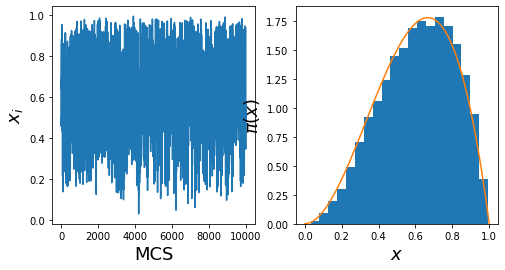

In [5]:
plotSamples(x)

# Metropolis MCMC 2D Example

Consider the following 2D PDF with three peaks:

$$\begin{align}
\pi(x,y) \sim & \exp\left(-\frac{1}{10} (x^2 + y^2)\right) + \\ & \frac{1}{2} \exp\left(-\frac{1}{20} ((x-20.)^2 +(y-20.)^2)\right) + \\ & \exp\left(-\frac{1}{200} ((x-40.)^2 + (y-40.)^2)\right)\\
\end{align}$$

In [6]:
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def probdist(x, y, domain):
	if(domain[0][0] < x < domain[0][1]) and (domain[1][0] < y < domain[1][1]):	        
		f  = np.exp(-1/10. * (x**2 + y**2))
		f += 0.5 * np.exp(-1/20. * ((x-20.)**2 + (y-20.)**2))
		f += np.exp(-1/200. * ((x-40.)**2 + (y-40.)**2))    	
	else:
		f  = 0.    	    
	return f
  
def proposal(x, y, delta):
	newx = x + delta * (2. * np.random.rand() - 1.)
	newy = y + delta * (2. * np.random.rand() - 1.)
	return newx, newy
        
def metropolis_accept(newx, newy, oldx, oldy, domain):
    """acceptance function"""
    
    numer = probdist(newx, newy, domain);
    denom = probdist(oldx, oldy, domain);

    if np.random.rand() < numer/denom:
        accept = True
        x, y = newx, newy
    else:
        accept = False
        x, y = oldx, oldy

    return accept, x, y
  
def driver(nsteps=10000, delta=10., thin=10, x0 = 0.0, y0 = 0.0):
	"""
		nsteps = 10000 # number of steps in the mcmc chain
		delta  = 10.   # delta for the proposal
		thin   = 10    # save every 10th point
		x0, y0 = (0,0) # initial stte
    """
	# preliminaries;

	domain = np.array([[-30.,100.],[-30.,100.]])

	x = x0; y = y0
		
	AccRatio = 0.  # target around 0.4
	NumSucc  = 0   # number of successes

	# record of points sampled after thinning
	recz = np.zeros((int(nsteps/thin), 2))

	for iMCS in range(nsteps): # Main Loop
		# propose -> accept
		newx, newy = proposal(x, y, delta)
		accept, newx, newy = metropolis_accept(newx, newy, x, y, domain)
		if accept:
			NumSucc += 1
			x, y = newx, newy

		if (iMCS % thin) == 0: # record
			recz[int(iMCS/thin)] = [x, y];

	AccRatio = float(NumSucc)/float(nsteps)
	
	return recz, AccRatio


In [7]:
recz, acc = driver(nsteps=10000, delta=1., thin=10, x0 = 0.0, y0 = 0.0)
print(acc)

0.8655


(-10.0, 70.0, -10.0, 70.0)

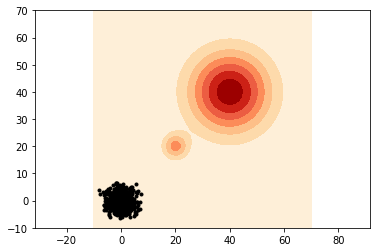

In [8]:
# Plotting
plt.plot(recz[:,0],recz[:,1],'k.')

x = np.linspace(-10,70,100)
X, Y = np.meshgrid(x,x)
m, n = X.shape
Z = np.zeros((m,n))


domain = np.array([[-30.,100.],[-30.,100.]])
for i in range(m):
	for j in range(n):
		Z[i,j] = probdist(X[i,j], Y[i,j], domain)
		
from matplotlib import cm
plt.contourf(X,Y,Z, cmap=cm.OrRd)
plt.axis('equal')

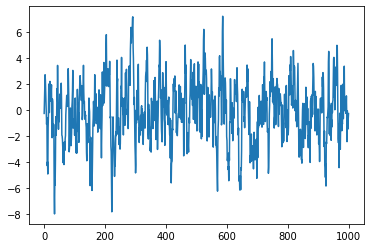

In [9]:
plt.plot(recz[:,0])